In [1]:
import ipython_import
import JDFS
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
SEED = 2018
from sklearn import metrics

importing Jupyter notebook from JDFS.ipynb


In [2]:
path_node1 = ['/home/luguangcheng/UAVnew/train_data_node1_0418.csv','/home/luguangcheng/UAVnew/test_data_node1_0430.csv']
path_node2 = ['/home/luguangcheng/UAVnew/train_data_node2_0418.csv','/home/luguangcheng/UAVnew/test_data_node2_0430.csv']
path_node3 = ['/home/luguangcheng/UAVnew/train_data_node3_0418.csv','/home/luguangcheng/UAVnew/test_data_node3_0430.csv']
path_node4 = ['/home/luguangcheng/UAVnew/train_data_node4_0418.csv','/home/luguangcheng/UAVnew/test_data_node4_0430.csv']
path_node5 = ['/home/luguangcheng/UAVnew/train_data_node5_0418.csv','/home/luguangcheng/UAVnew/test_data_node5_0430.csv']
path_set=[path_node1,path_node2,path_node3,path_node4,path_node5]

In [3]:
def read_path(path):
    train_data = pd.read_csv(path[0],header=0) #全部数据中的训练部分
    test_data = pd.read_csv(path[1],header=0) #全部数据中的测试部分
    X_train = train_data.drop('label',axis=1)
    y_train = train_data['label']
    X_test = test_data.drop('label',axis=1)
    y_test = test_data['label']
    return X_train,y_train,X_test,y_test

In [4]:
x_train,y_train,x_test,y_test = read_path(path_node5)

In [5]:
x_train

,psd_mean_0,psd_mean_1,psd_mean_10,psd_mean_11,psd_mean_12,psd_mean_13,psd_mean_14,psd_mean_15,psd_mean_16,psd_mean_17,...,psd_cha_20,psd_cha_21,psd_cha_22,psd_cha_23,psd_cha_24,psd_cha_25,psd_cha_26,psd_cha_27,psd_cha_28,psd_cha_29
0,0.488971,0.583699,0.992751,0.993607,0.988645,0.994912,0.995731,0.990417,0.987077,0.988454,...,0.173913,0.50,0.761905,0.521739,0.681818,0.333333,0.521739,0.518519,0.428571,0.318182
1,0.691879,0.809649,0.988729,0.994424,0.988886,0.989096,0.994089,0.987504,0.988656,0.985365,...,0.260870,0.35,0.571429,0.565217,0.363636,0.333333,0.304348,0.444444,0.214286,0.500000
2,0.428795,0.792237,0.989003,0.989057,0.980840,0.994564,0.992265,0.991910,0.990739,0.990362,...,0.434783,0.30,0.809524,0.478261,0.409091,0.619048,0.260870,0.333333,0.428571,0.500000
3,0.780741,0.620266,0.985243,0.992728,0.989640,0.991638,0.986256,0.989551,0.989287,0.986816,...,0.043478,0.40,0.380952,0.521739,0.590909,0.428571,0.391304,0.296296,0.357143,0.772727
4,0.667781,0.873311,0.994939,0.994353,0.990272,0.984693,0.995865,0.992366,0.983443,0.988358,...,0.347826,0.60,0.380952,0.608696,0.545455,0.761905,0.652174,0.111111,0.428571,0.681818
5,0.656209,0.587424,0.983403,0.988594,0.985104,0.982889,0.982333,0.983377,0.989758,0.994023,...,0.130435,0.60,0.571429,0.652174,0.636364,0.571429,0.478261,0.370370,0.285714,0.545455
6,0.416321,0.554625,0.981291,0.991325,0.990596,0.986117,0.996705,0.985306,0.990413,0.986378,...,0.304348,0.50,0.619048,0.608696,0.409091,0.476190,0.521739,0.222222,0.285714,0.454545
7,0.540264,0.681718,0.981246,0.993755,0.982206,0.988318,0.990911,0.989212,0.988334,0.985899,...,0.260870,0.25,0.619048,0.391304,0.500000,0.523810,0.608696,0.333333,0.357143,0.727273
8,0.675327,0.724206,0.987879,0.989807,0.988048,0.998069,0.990722,0.989629,0.987527,0.989206,...,0.304348,0.35,0.619048,0.521739,0.318182,0.333333,0.434783,0.222222,0.392857,0.590909
9,0.856462,0.490517,0.991267,0.991109,0.991697,0.987633,0.982568,0.982533,0.986965,0.985648,...,0.391304,0.70,0.761905,0.565217,0.409091,0.380952,0.652174,0.481481,0.321429,0.545455


In [16]:
x_train['psd_cha_29']

0       0.318182
1       0.500000
2       0.500000
3       0.772727
4       0.681818
5       0.545455
6       0.454545
7       0.727273
8       0.590909
9       0.545455
10      0.590909
11      0.454545
12      0.409091
13      0.500000
14      0.363636
15      0.727273
16      0.545455
17      0.454545
18      0.681818
19      0.636364
20      0.272727
21      0.318182
22      0.454545
23      0.454545
24      0.409091
25      0.454545
26      0.409091
27      0.318182
28      0.590909
29      0.409091
          ...   
4970    0.681818
4971    0.363636
4972    0.590909
4973    0.590909
4974    0.545455
4975    0.681818
4976    0.500000
4977    0.454545
4978    0.500000
4979    0.181818
4980    0.409091
4981    0.772727
4982    0.727273
4983    0.545455
4984    0.363636
4985    0.681818
4986    0.772727
4987    0.545455
4988    0.454545
4989    0.500000
4990    0.454545
4991    0.454545
4992    0.409091
4993    0.545455
4994    0.500000
4995    0.500000
4996    0.409091
4997    0.4545

In [28]:
y_train[range(3500)]

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
3470    0
3471    0
3472    0
3473    0
3474    0
3475    0
3476    0
3477    0
3478    0
3479    0
3480    0
3481    0
3482    0
3483    0
3484    0
3485    0
3486    0
3487    0
3488    0
3489    0
3490    0
3491    0
3492    0
3493    0
3494    0
3495    0
3496    0
3497    0
3498    0
3499    0
Name: label, Length: 3500, dtype: int64

In [8]:
sorted_feature = JDFS.feature_sort(x_train,y_train) #对特征进行排序
feature,score,clf = JDFS.feature_selection(x_train,y_train,sorted_feature)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


In [9]:
feature

['psd_mean_26',
 'psd_mean_19',
 'psd_mean_18',
 'psd_mean_9',
 'psd_mean_23',
 'psd_mean_10',
 'psd_mean_15',
 'psd_mean_5',
 'psd_mean_7',
 'psd_mean_4',
 'psd_mean_21',
 'psd_mean_27',
 'psd_mean_11',
 'psd_mean_17',
 'psd_mean_12',
 'psd_mean_13',
 'psd_mean_24',
 'psd_mean_14',
 'psd_mean_3',
 'psd_mean_16',
 'psd_mean_8',
 'psd_cha_3',
 'psd_cha_8']

In [18]:
score

0.84919999999999995

In [22]:
x_train = x_train[feature]
x_test = x_test[feature]
x_train = np.array(x_train)
x_test = np.array(x_test)
oof_train,oof_test = get_oof(clf,x_train,y_train,x_test)

In [23]:
oof_train

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [26]:
kf = KFold(n_splits=5,shuffle=True,random_state=22)
for i,(train_index,test_index) in enumerate(kf.split(x_train)):
    print i,train_index,test_index

0 [   1    2    3 ..., 4993 4994 4999] [   0    4    5    7   24   28   38   41   43   55   57   62   65   66   68
   70   86   87   92   94  104  106  109  113  115  117  124  134  137  138
  148  156  158  159  168  170  171  180  183  190  191  195  196  204  209
  211  213  217  221  226  229  230  232  236  245  247  256  257  265  266
  267  272  275  283  285  287  292  303  305  308  309  312  314  336  340
  342  351  357  362  373  374  402  404  413  416  417  422  425  429  433
  436  438  441  444  451  454  470  474  489  494  500  505  509  512  522
  531  533  538  542  548  553  555  559  567  574  575  577  578  594  602
  605  607  611  620  625  629  631  635  638  639  646  647  654  655  662
  666  677  681  683  688  689  693  694  698  709  718  723  724  728  734
  751  756  758  761  765  773  774  776  778  783  791  798  806  807  813
  814  824  827  833  836  837  840  841  845  855  856  860  862  866  882
  884  888  891  892  901  902  905  908  910  91

In [4]:
def model_stacking(path_set,ntrain,ntest):    
    train_stack = np.empty((ntrain,len(path_set)))
    test_stack = np.empty((ntest,len(path_set)))
    for i in range(len(path_set)):
        x_train,y_train,x_test,y_test = read_path(path_set[i])
        # 特征选择与模型训练
        sorted_feature = JDFS.feature_sort(x_train,y_train) #对特征进行排序
        feature,score,clf = JDFS.feature_selection(x_train,y_train,sorted_feature)
        x_train = x_train[feature]
        x_test = x_test[feature]
        x_train = np.array(x_train)
        x_test = np.array(x_test)
        oof_train,oof_test = get_oof(clf,x_train,y_train,x_test)
        train_stack[:,i] = oof_train
        test_stack[:,i] = oof_test
    lr = LogisticRegression()
    lr.fit(train_stack,y_train)
    y_pre = lr.predict(test_stack)
    accuracy = metrics.accuracy_score(y_test,y_pre)
    return y_test,y_pre,train_stack,test_stack,accuracy

In [20]:
def get_oof(clf,x_train,y_train,x_test):
    ntrain = x_train.shape[0]
    ntest = x_test.shape[0]
    kf = KFold(n_splits=5,random_state=SEED)
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((5,ntest))
    for i,(train_index,test_index) in enumerate(kf.split(x_train)):
        kf_x_train = x_train[train_index]
        kf_y_train = y_train[train_index]
        kf_x_test = x_train[test_index]
        clf.fit(kf_x_train,kf_y_train)
        oof_train[test_index] = clf.predict(kf_x_test)
        oof_test_skf[i,:] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    oof_test = map(lambda x:1 if x>0.5 else 0,oof_test)
    oof_test = np.array(oof_test)
    return oof_train,oof_test

In [6]:
y_test,y_pre,train_stack,test_stack,accuracy = model_stacking(path_set,5000,1000)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, categ

In [7]:
a = pd.DataFrame(test_stack)
a

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,0.0
5,1.0,1.0,1.0,1.0,0.0
6,1.0,1.0,1.0,1.0,0.0
7,1.0,1.0,1.0,1.0,0.0
8,1.0,1.0,1.0,1.0,0.0
9,1.0,1.0,1.0,1.0,0.0


In [12]:
a.iloc[range(300,400),:]

,0,1,2,3,4
300,1.0,1.0,1.0,1.0,0.0
301,1.0,1.0,1.0,1.0,0.0
302,1.0,1.0,1.0,1.0,0.0
303,1.0,1.0,1.0,1.0,0.0
304,1.0,1.0,1.0,1.0,0.0
305,1.0,1.0,1.0,1.0,0.0
306,1.0,1.0,1.0,1.0,0.0
307,1.0,1.0,1.0,1.0,0.0
308,1.0,1.0,1.0,1.0,0.0
309,1.0,1.0,1.0,1.0,0.0


In [9]:
a.mean(axis=0)

0    0.500
1    0.438
2    0.400
3    0.396
4    0.330
dtype: float64

In [8]:
accuracy

1.0

In [13]:
y_pre

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [19]:
oof_train = np.zeros((5,))
#oof_train = oof_train.reshape(-1,1)
oof_train

array([ 0.,  0.,  0.,  0.,  0.])

In [17]:
train_stack = np.ones((5,3))
train_stack

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [20]:
train_stack[:,1] = oof_train

In [22]:
train_stack.mean(axis=0)

array([ 1.,  0.,  1.])

In [23]:
oof_test = np.zeros((3,))

In [24]:
oof_test[:] = train_stack.mean(axis=0)
oof_test

array([ 1.,  0.,  1.])

In [25]:
oof_test = map(lambda x:1 if x>0.5 else 0,oof_test)
oof_test

[1, 0, 1]

In [26]:
oof_test = np.array(oof_test)
oof_test

array([1, 0, 1])

In [7]:
x_train,y_train,x_test,y_test = read_path(path_set[0])

In [15]:
x_train = np.array(x_train)
x_train

array([[ 0.96539136,  0.97916092,  0.99965284, ...,  0.13793103,
         0.15384615,  0.65384615],
       [ 0.92262017,  0.98518812,  0.99965309, ...,  0.17241379,
         0.13461538,  0.61538462],
       [ 0.93398238,  0.98924137,  0.99962235, ...,  0.31034483,
         0.11538462,  0.38461538],
       ..., 
       [ 0.12742643,  0.14662497,  0.05645782, ...,  0.89655172,
         0.78846154,  0.57692308],
       [ 0.10350127,  0.11303491,  0.05918372, ...,  0.51724138,
         0.78846154,  0.65384615],
       [ 0.11751184,  0.06769057,  0.03288643, ...,  0.37931034,
         0.86538462,  0.57692308]])

In [11]:
kf = KFold(n_splits=5,random_state=SEED)
print enumerate(kf.split(x_train))

In [18]:
for train_index,test_index in kf.split(x_train):
    print train_index,test_index
    kf_x_train = x_train[train_index]
    kf_y_train = y_train[train_index]
    kf_x_test = x_train[test_index]

[1000 1001 1002 ..., 4997 4998 4999] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 2

In [ ]:
# 预测
clf.predict(X_test[feature])

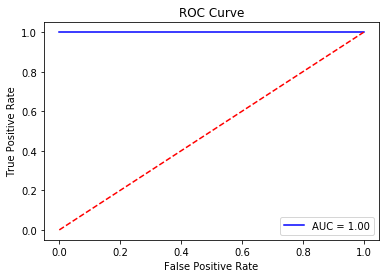

In [4]:
# 画ROC曲线
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

actual = [1,1,1,0,0,0]   #实际值
predictions = [0.9,0.9,0.9,0.1,0.1,0.1]   #预测概率
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)  #根据不同阈值得到的虚警率与召回率
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')  #基准线
#plt.xlim([-0.1,1.2])
#plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [7]:
np.where(np.diff(predictions))

(array([2]),)